<a href="https://colab.research.google.com/github/2003Yash/OpenCV-Notes-Implementation/blob/main/OpenCV_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Reading an Image

In [21]:
snoop_image_path = "/content/snoop.jpeg"
snoop_image = cv.imread(snoop_image_path)
snoop_image_2 = cv.imread(snoop_image_path,3) # 2nd param is image flagger tells how to read an image and  is usually defauly
snoop_image_3 = cv.imread(snoop_image_path, cv.IMREAD_GRAYSCALE)

In [15]:
cv.IMREAD_GRAYSCALE # so instead of using cv.IMREAD_GREYSCALE() we can just use 0 for 2nd param

0

In [4]:
print(snoop_image) #just numpy ararys

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 249 250]
  [255 249 250]
  [255 247 248]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 249 250]
  [255 249 250]
  [255 247 248]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 249 250]
  [255 249 250]
  [255 247 248]]

 ...

 [[131 122 125]
  [131 122 125]
  [136 127 130]
  ...
  [ 98  89  92]
  [127 118 121]
  [126 118 119]]

 [[124 115 118]
  [127 118 121]
  [135 126 129]
  ...
  [ 97  88  91]
  [124 115 118]
  [129 121 122]]

 [[130 121 124]
  [134 125 128]
  [124 115 118]
  ...
  [ 80  71  74]
  [113 104 107]
  [131 123 124]]]


In [5]:
print(snoop_image.shape) # 3 channels of rgb for coloured images

(225, 225, 3)


In [7]:
print(snoop_image_3.shape) # since greyscale images has only 1 channel

(225, 225)


Displaying images using opencv

In [ ]:
cv.imshow("snoop", snoop_image) # displays snoop image in a window with a title snoop
cv.waitKey(0) # amount of time it waits for user to press any key so it can move to next line of code
cv.destroyAllWindows() # destroys all open windows

# this code may not work with colab

Displaying using matplotlib

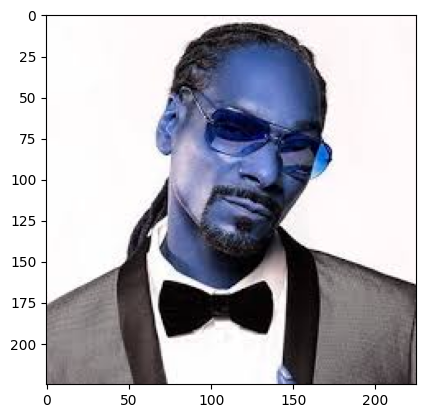

In [11]:
plt.imshow(snoop_image) # displays image using matplotlib
plt.show()

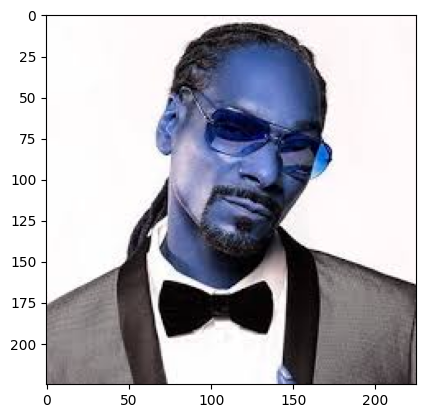

In [22]:
plt.imshow(snoop_image_2)
plt.show()

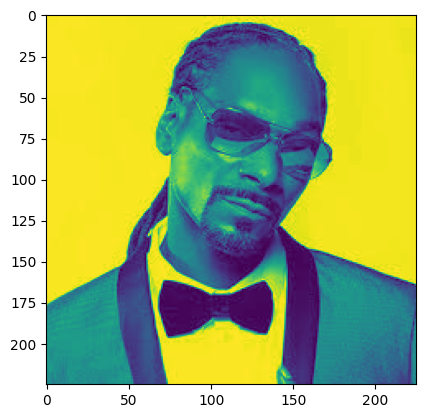

In [13]:
plt.imshow(snoop_image_3)
plt.show()

Accessing pixel values in image

In [23]:
print(snoop_image[50,50]) # prints the pixel values of all channels at 50,50 pixel

[255 250 251]


In [24]:
print(snoop_image[50,50][0]) # first channel pixel value at 50,50

255


Change Specific Pixel Value

In [27]:
snoop_image[50,50][0] = 0  # changes value of first channel 50,50 pixel to zero

In [28]:
print(snoop_image[50,50][0])

0


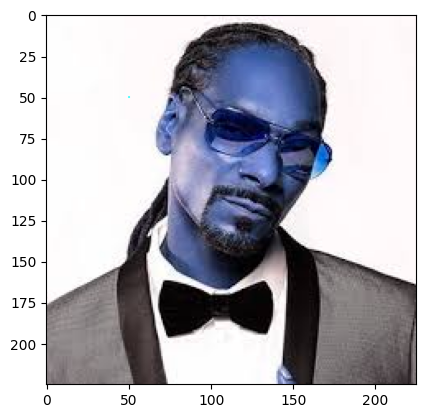

In [29]:
plt.imshow(snoop_image) # if we zoom in we can see 1 blue dot a 50,50 in white space of image, it's blue it's not black since we only modified 1 channel
plt.show()

Modify Image ROI (region of interest)

In [30]:
snoop_temp  = snoop_image.copy() # creates copy of given image

In [33]:
snoop_temp[100:120,80:120][0] = 0 # modifies ROI
                                  # modify 100 to 150 pixel in x axis and 80 to 120 pixels in y axis

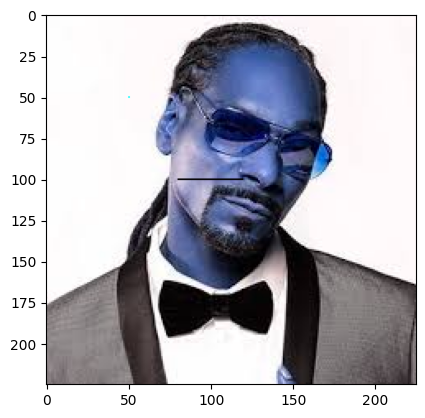

In [34]:
plt.imshow(snoop_temp)
plt.show()

Resize the Image

In [35]:
resized_downscale = cv.resize(snoop_image, (50,50))

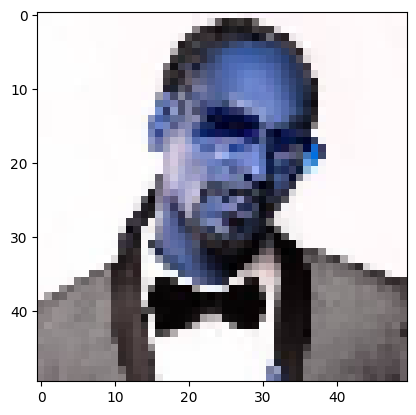

In [36]:
plt.imshow(resized_downscale)
plt.show()

In [37]:
resized_upscale = cv.resize(snoop_image, (1000,1000))

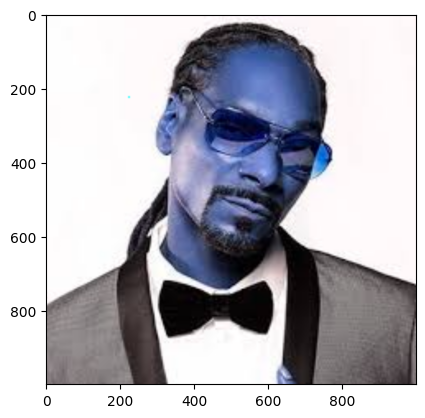

In [38]:
plt.imshow(resized_upscale)
plt.show()

Resizing the image without Changing aspect ratio = ie., we give width or height and calculate other parm according to original image

In [39]:
h, w, channels = snoop_temp.shape

In [40]:
# computing height if we want wight to 300 pixels
ratio = 300/w
new_h = int(h*ratio)
new_h

300

In [43]:
resized = cv.resize(snoop_temp, (300,new_h))

Image rotations code can be generated in colab

CROPPING IMAGES

In [44]:
new_image = snoop_image[100:200,100:200]

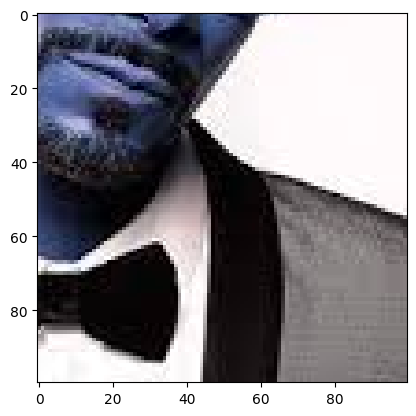

In [45]:
plt.imshow(new_image)
plt.show()

Convert to grey-scale

In [46]:
new_image.shape # coloured images have 3 channels BGR

(100, 100, 3)

In [47]:
new_grey_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)

In [48]:
new_grey_image.shape # grey scle images have single channel

(100, 100)

Thresholding Images

Threholding means we say all pixels above certain value should be white and all pixels below certain value should be black

In [54]:
_ , threshold_image = cv.threshold(snoop_image, 100, 255, cv.THRESH_BINARY) # since first parameter is a unneccesary dummy value we use _

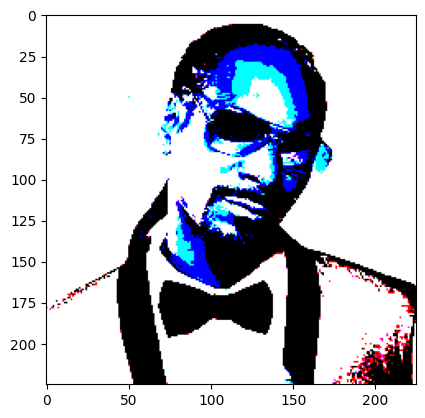

In [55]:
plt.imshow(threshold_image)
plt.show()

Edge Detection

In [56]:
edges = cv.Canny(snoop_image, 100, 200)
# canny = -> reduces noise
#         -> finds intensity gradient of images
#         -> no-max suppresion to remove unwanted pixels
#         -> uses hypothesis Threshold method between given 2nd and 3rd para and draws the edge

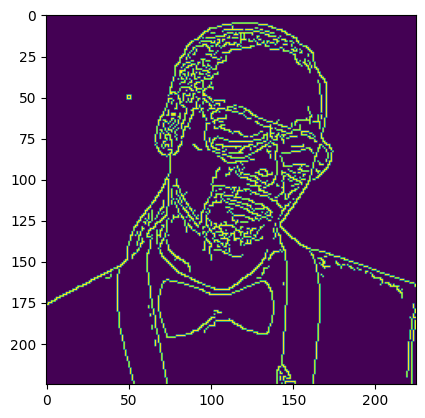

In [57]:
plt.imshow(edges)
plt.show()

In [59]:
edges_2 = cv.Canny(snoop_image, 10, 200)

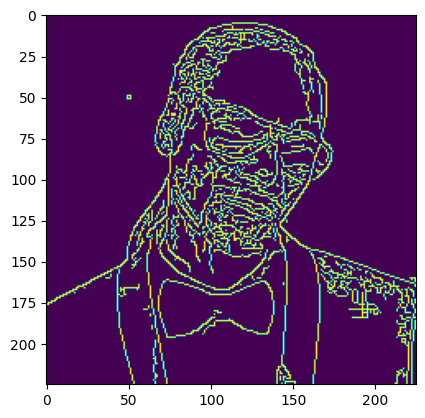

In [60]:
plt.imshow(edges_2)
plt.show()

Morpholigical Tranformations -> Mathematical Techniques to reduce image noise

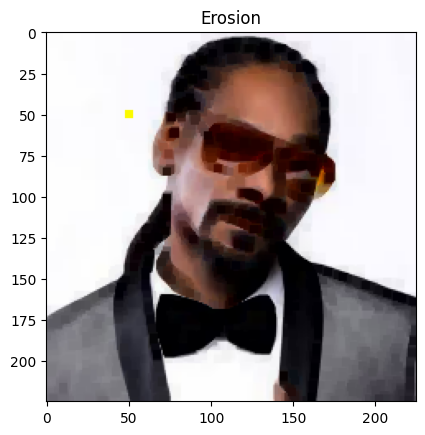

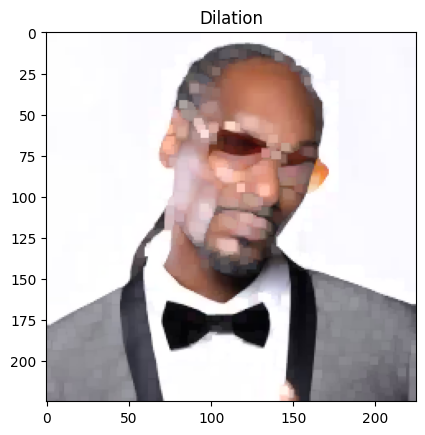

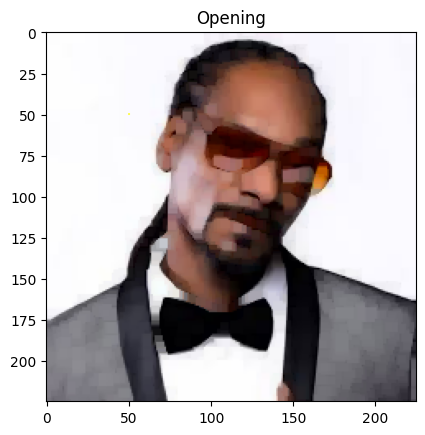

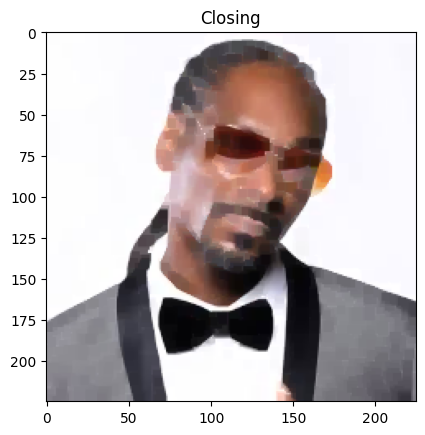

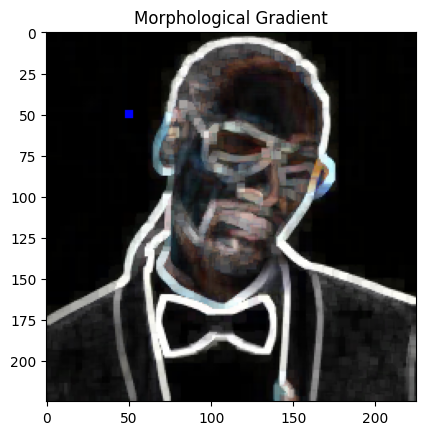

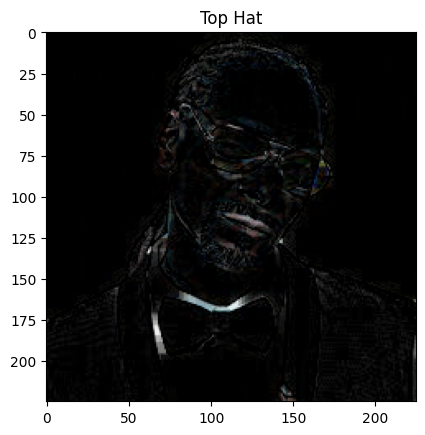

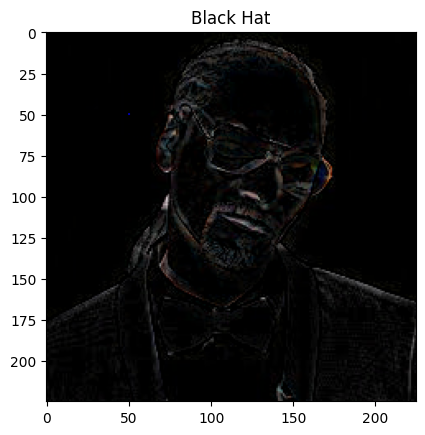

In [61]:
# Morphological Transformations -> [READ DOCUMENTS/BLOGS TO UNDERSTAND THEM BETTER]

# 1. Erosion
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(snoop_image, kernel, iterations=1)
plt.imshow(cv.cvtColor(erosion, cv.COLOR_BGR2RGB))
plt.title('Erosion')
plt.show()

# 2. Dilation
dilation = cv.dilate(snoop_image, kernel, iterations=1)
plt.imshow(cv.cvtColor(dilation, cv.COLOR_BGR2RGB))
plt.title('Dilation')
plt.show()

# 3. Opening (Erosion followed by Dilation)
opening = cv.morphologyEx(snoop_image, cv.MORPH_OPEN, kernel)
plt.imshow(cv.cvtColor(opening, cv.COLOR_BGR2RGB))
plt.title('Opening')
plt.show()

# 4. Closing (Dilation followed by Erosion)
closing = cv.morphologyEx(snoop_image, cv.MORPH_CLOSE, kernel)
plt.imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))
plt.title('Closing')
plt.show()

# 5. Morphological Gradient (Difference between dilation and erosion)
gradient = cv.morphologyEx(snoop_image, cv.MORPH_GRADIENT, kernel)
plt.imshow(cv.cvtColor(gradient, cv.COLOR_BGR2RGB))
plt.title('Morphological Gradient')
plt.show()

# 6. Top Hat (Difference between input image and opening of the image)
tophat = cv.morphologyEx(snoop_image, cv.MORPH_TOPHAT, kernel)
plt.imshow(cv.cvtColor(tophat, cv.COLOR_BGR2RGB))
plt.title('Top Hat')
plt.show()

# 7. Black Hat (Difference between closing of the input image and input image)
blackhat = cv.morphologyEx(snoop_image, cv.MORPH_BLACKHAT, kernel)
plt.imshow(cv.cvtColor(blackhat, cv.COLOR_BGR2RGB))
plt.title('Black Hat')
plt.show()

Working with Video -> Live Webcam Feed

In [ ]:
import cv2

cap = cv2.VideoCapture(0) #This initializes the connection to your webcam.
# The argument 0 refers to the index of the camera.
# If you have multiple cameras (like an external webcam in addition to the built-in one), you can change the index to 1, 2, etc., to select the correct one.

## ---- cap is variable refers to webcam -----

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open video stream or file.")
    exit() # stops the execution of this program

while True:
    # Capture frame-by-frame
    ret, frame = cap.read() # ret: This is a boolean value that indicates whether the frame was successfully captured
                            # frame: This holds the actual frame/image data captured from the webcam. Each frame is a NumPy array representing the image.

    # If frame is read correctly, ret is True
    if not ret:
        print("Failed to grab frame")
        break

    # Display the resulting frame
    cv2.imshow('Webcam', frame) # This displays the current frame (captured from the webcam) in a window named 'Webcam'.
                                # The frame is continuously updated with new data as the webcam captures more frames.

    # Press 'q' to exit the webcam window
    if cv2.waitKey(1) & 0xFF == ord('q'): # Waits for a key event for 1 millisecond.This function also allows the video to update the display window. The argument 1 specifies how long (in milliseconds) to wait for a key press before continuing. A small value ensures smooth video.
        break                             # & 0xFF == ord('q'): Checks if the 'q' key has been pressed. The ord('q') converts the character 'q' into its ASCII value, and the & 0xFF operation ensures the correct comparison across platforms.

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()